In [111]:
import nltk
import pandas as pd
from collections import defaultdict

In [112]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [113]:
with open('data/train.txt', 'r', encoding='utf-8') as file:
    train = file.read()
with open('data/test.txt', 'r', encoding='utf-8') as file:
    test = file.read()


In [114]:
train_tokens = nltk.word_tokenize(train)
test_tokens = nltk.word_tokenize(test)

In [115]:
train_tokens[:10]

['``', '=', '2013', '–', '14', 'York', 'City', 'F.C', '.', 'season']

In [116]:
test_tokens[:10]

['``', '=', 'Tropical', 'Storm', '<', 'unk', '>', '(', '2008', ')']

In [117]:
train_tokens = [token.lower() for token in train_tokens if token.isalpha()]
test_tokens = [token.lower() for token in test_tokens if token.isalpha()]

In [118]:
train_tokens[:10]

['york',
 'city',
 'season',
 'the',
 'season',
 'was',
 'the',
 'unk',
 'season',
 'of']

In [119]:
test_tokens[:10]

['tropical',
 'storm',
 'unk',
 'tropical',
 'storm',
 'unk',
 'was',
 'the',
 'tenth',
 'tropical']

In [120]:
unigram_counts = defaultdict(int)
for word in train_tokens:
    unigram_counts[word] += 1


In [121]:
bigram_counts = defaultdict(lambda: defaultdict(int))
for i in range(len(train_tokens) - 1):
    current_word = train_tokens[i]
    next_word = train_tokens[i + 1]
    bigram_counts[current_word][next_word] += 1


In [122]:
for (word), next_words in list(bigram_counts.items())[:5]:
    print(f"({word}) -> {dict(next_words)}")


(york) -> {'city': 88, 'north': 1, 'manager': 1, 'were': 8, 'qualified': 1, 'finished': 2, 'while': 1, 'retained': 1, 'began': 1, 'match': 1, 'then': 3, 'the': 20, 'suffered': 1, 'run': 4, 'achieved': 4, 'win': 1, 'drew': 4, 'three': 1, 'away': 3, 'twice': 1, 'back': 1, 'bowman': 1, 'with': 5, 'first': 3, 'signed': 1, 'home': 2, 'last': 1, 'goal': 1, 'would': 1, 'in': 32, 'by': 5, 'on': 8, 'fell': 1, 'went': 1, 'won': 1, 'moved': 3, 'only': 1, 'drop': 1, 'held': 1, 'had': 3, 'moving': 1, 'consolidated': 1, 'opened': 1, 'fought': 2, 'lost': 1, 'player': 2, 'racecourse': 1, 'mostly': 1, 'defensive': 1, 'matches': 1, 'top': 2, 'released': 1, 'summer': 1, 'out': 1, 'contract': 1, 'players': 1, 'writer': 1, 'and': 29, 'international': 1, 'comic': 1, 'yankees': 16, 'times': 82, 'post': 10, 'was': 5, 'university': 7, 'film': 1, 'fashion': 3, 'referring': 1, 'sportswriters': 1, 'athletic': 2, 'members': 1, 'champion': 1, 'oscar': 1, 'recording': 2, 'waymon': 1, 'police': 1, 'lincoln': 1, 'dail

In [123]:
def predict_bigram(current_word, bigram_counts):
    if current_word not in bigram_counts:
        return '<unk>'
    next_words = bigram_counts[current_word]
    max_count = max(next_words.values())
    for word, count in next_words.items():
        if count == max_count:
            return word

In [124]:
for words in test_tokens[:5]:
  bigram = predict_bigram(words, bigram_counts)
  print(f"word before: {words}")
  print(f"predicted word {bigram}")
  print("\n")


word before: tropical
predicted word storm


word before: storm
predicted word was


word before: unk
predicted word unk


word before: tropical
predicted word storm


word before: storm
predicted word was




In [125]:
trigram_counts = defaultdict(lambda: defaultdict(int))
for i in range(len(train_tokens) - 2):
    word1 = train_tokens[i]
    word2 = train_tokens[i + 1]
    word3 = train_tokens[i + 2]
    trigram_counts[(word1, word2)][word3] += 1


In [126]:
for (word1, word2), next_words in list(trigram_counts.items())[:5]:  # Show first 5 entries
    print(f"({word1}, {word2}) -> {dict(next_words)}")


(york, city) -> {'season': 1, 'football': 1, 'first': 1, 'feeling': 1, 'on': 8, 'they': 1, 'when': 1, 'at': 1, 'new': 4, 'rachel': 1, 'who': 1, 'department': 1, 'agnes': 1, 'in': 8, 'from': 1, 'and': 7, 'this': 1, 'j': 1, 'i': 3, 'the': 5, 'describing': 1, 'fey': 1, 'total': 1, 'centre': 2, 'later': 1, 'cresswell': 2, 'youth': 1, 'playing': 1, 'teammate': 1, 'she': 1, 'was': 1, 'placed': 1, 'united': 1, 'police': 1, 'to': 2, 'with': 3, 'welsh': 1, 'where': 1, 'during': 2, 'dozens': 1, 'a': 1, 'times': 1, 'leased': 1, 'residence': 1, 'hurricane': 1, 'using': 1, 'stevens': 1, 'downtown': 1, 'unk': 1, 'east': 1, 'london': 1, 'he': 1, 'beyoncé': 1}
(city, season) -> {'the': 1}
(season, the) -> {'season': 4, 'pacific': 2, 'second': 1, 'unk': 3, 'darkness': 1, 'atlantic': 3, 'fifth': 1, 'upperparts': 1, 'call': 1, 'first': 2, 'episode': 3, 'pirates': 1, 'highest': 1, 'most': 1, 'english': 1, 'loan': 1, 'twenty': 1, 'character': 1, 'ornamental': 1, 'team': 10, 'red': 1, 'producers': 1, 'desig

In [127]:
def predict_trigram(word1, word2, trigram_counts):
    context = (word1, word2)
    if context not in trigram_counts:
        return '<unk>'
    next_words = trigram_counts[context]
    max_count = max(next_words.values())
    for word, count in next_words.items():
        if count == max_count:
            return word


In [128]:
for i in range(10):
    word1 = test_tokens[i]
    word2 = test_tokens[i + 1]
    predicted_word = predict_trigram(word1, word2, trigram_counts)
    print(f"Input: ({word1}, {word2}) -> Predicted: {predicted_word}")


Input: (tropical, storm) -> Predicted: on
Input: (storm, unk) -> Predicted: vehicle
Input: (unk, tropical) -> Predicted: storm
Input: (tropical, storm) -> Predicted: on
Input: (storm, unk) -> Predicted: vehicle
Input: (unk, was) -> Predicted: the
Input: (was, the) -> Predicted: first
Input: (the, tenth) -> Predicted: commandment
Input: (tenth, tropical) -> Predicted: <unk>
Input: (tropical, storm) -> Predicted: on


In [129]:
def calculateMeteorProbability(count, total, alpha=1):
    return (count + alpha) / (total + alpha)


In [130]:
import math

def calculate_perplexity(model_counts, test_sequence, n, alpha=1):
    # Determine the total number of words in the test sequence.
    total_words = len(test_sequence)

    # If there are fewer words than the size of the n-gram (n), we can't compute perplexity.
    if total_words < n:
        return 0  # Not enough words to calculate perplexity

    # Initialize variables:
    # 'perplexity' will accumulate the sum of log probabilities.
    # 'total_contexts' will count how many n-gram contexts we evaluated.
    perplexity = 0
    total_contexts = 0

    # Loop through the test sequence starting from the position where we have enough words
    # to form an n-gram.
    for i in range(n - 1, total_words):
        # Extract the context: the previous n-1 tokens.
        # For instance, if n == 3 (a trigram), we take the two words before the current position.
        context = tuple(test_sequence[i - n + 1:i])

        # For unigrams (n == 1), there is no preceding context, so we use an empty tuple.
        if n == 1:
            context = ()

        # The next word is the current token at position i.
        next_word = test_sequence[i] if (i < total_words) else None

        # --- Counting Occurrences ---
        # For unigrams, 'context_count' is simply the count of the word.
        if n == 1:
            context_count = model_counts.get(next_word, 0)
        else:
            # For bigrams/trigrams, we look up how many times 'next_word' follows the 'context'.
            context_count = model_counts.get(context, {}).get(next_word, 0)

        # Calculate the total number of occurrences for this context.
        # For unigrams, it is the total count of all words.
        if n == 1:
            total = sum(model_counts.values())
        else:
            # For higher n-grams, sum over all words that have been seen after this context.
            total = sum(model_counts.get(context, {}).values()) if context in model_counts else 0

        # --- Applying Laplace (Add-One) Smoothing ---
        # Smoothing adds a small constant (alpha) to avoid zero probabilities.
        # Here, 'smoothed_prob' is a preliminary smoothed probability.
        smoothed_prob = (context_count + alpha) / (total + alpha)

        # Now, calculate the final probability for the next word.
        if next_word is not None:
            if n == 1:
                # For unigrams, the final probability is the smoothed probability.
                final_prob = smoothed_prob
            else:
                # For bigrams/trigrams:
                # We look up the count for the specific next word after the context.
                next_word_count = model_counts.get(context, {}).get(next_word, 0)
                # Then apply Laplace smoothing to the next word probability.
                # Note: the denominator here uses (context_count + alpha * (len(test_sequence) - 1))
                # which is a simplified way to approximate the total number of possible outcomes.
                final_prob = (next_word_count + alpha) / (context_count + alpha * (len(test_sequence) - 1))
        else:
            final_prob = 0

        # --- Accumulating the Log Probabilities ---
        # Only if we have a nonzero probability do we add its log.
        if final_prob > 0:
            log_prob = math.log2(final_prob)
            perplexity += log_prob

        # Count each context (each prediction) processed.
        total_contexts += 1

    # If no contexts were processed, return infinity to indicate an error.
    if total_contexts == 0:
        return float('inf')

    # --- Calculating the Final Perplexity ---
    # Average the log probability over all contexts.
    avg_log_prob = perplexity / total_contexts
    # Exponentiate to get back from the log space:
    perplexity_value = 2 ** (-avg_log_prob)
    return perplexity_value


In [131]:
unigram_perplexity = calculate_perplexity(unigram_counts, test_tokens, 1)
bigram_perplexity = calculate_perplexity(bigram_counts, test_tokens, 2)
trigram_perplexity = calculate_perplexity(trigram_counts, test_tokens, 3)

print(f"Unigram Perplexity: {unigram_perplexity}")
print(f"Bigram Perplexity: {bigram_perplexity}")
print(f"Trigram Perplexity: {trigram_perplexity}")


Unigram Perplexity: 973.6622920317602
Bigram Perplexity: 174496.99999521792
Trigram Perplexity: 87329.84248001105


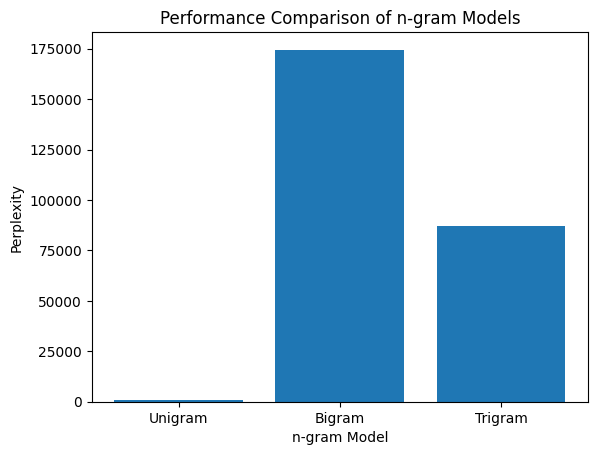

In [132]:
import matplotlib.pyplot as plt

perplexities = [unigram_perplexity, bigram_perplexity, trigram_perplexity]
n_grams = ['Unigram', 'Bigram', 'Trigram']

plt.bar(n_grams, perplexities)
plt.xlabel('n-gram Model')
plt.ylabel('Perplexity')
plt.title('Performance Comparison of n-gram Models')
plt.show()


In [133]:
word_counts = defaultdict(int)
for word in train_tokens:
    word_counts[word] += 1

threshold = 5
train_tokens_unk = []
for word in train_tokens:
    if word_counts[word] > threshold:
        train_tokens_unk.append(word)
    else:
        train_tokens_unk.append('<unk>')

train_tokens = train_tokens_unk

In [134]:
unigram_counts = defaultdict(int)
for word in train_tokens:
    unigram_counts[word] += 1

bigram_counts = defaultdict(lambda: defaultdict(int))
for i in range(len(train_tokens) - 1):
    current_word = train_tokens[i]
    next_word = train_tokens[i + 1]
    bigram_counts[current_word][next_word] += 1
trigram_counts = defaultdict(lambda: defaultdict(int))
for i in range(len(train_tokens) - 2):
    word1 = train_tokens[i]
    word2 = train_tokens[i + 1]
    word3 = train_tokens[i + 2]
    trigram_counts[(word1, word2)][word3] += 1


In [135]:
unigram_perplexity = calculate_perplexity(unigram_counts, test_tokens, 1)
bigram_perplexity = calculate_perplexity(bigram_counts, test_tokens, 2)
trigram_perplexity = calculate_perplexity(trigram_counts, test_tokens, 3)

print(f"Unigram Perplexity: {unigram_perplexity}")
print(f"Bigram Perplexity: {bigram_perplexity}")
print(f"Trigram Perplexity: {trigram_perplexity}")


Unigram Perplexity: 1002.0162993564766
Bigram Perplexity: 174496.99999521792
Trigram Perplexity: 87511.85542190341


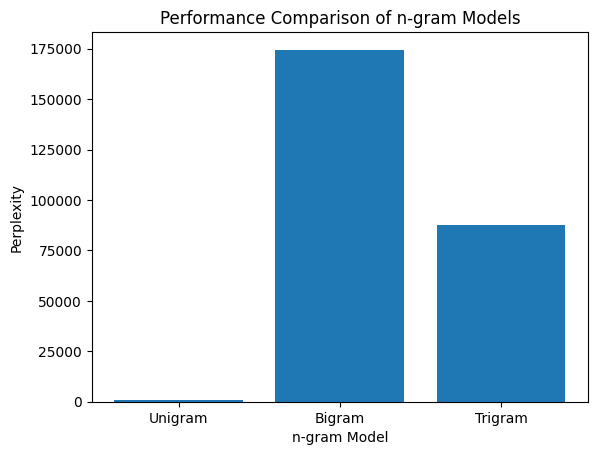

In [136]:
import matplotlib.pyplot as plt

perplexities = [unigram_perplexity, bigram_perplexity, trigram_perplexity]
n_grams = ['Unigram', 'Bigram', 'Trigram']

plt.bar(n_grams, perplexities)
plt.xlabel('n-gram Model')
plt.ylabel('Perplexity')
plt.title('Performance Comparison of n-gram Models')
plt.show()
